In [2]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import numpy as np

sklearn.__version__

'1.0.2'

In [3]:
data = pd.read_csv("../creditcard.csv")

In [4]:
shape = data.shape
print(shape)

data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
class_col = data["Class"]
X = data.drop(["Class"], axis=1)


print(sum(class_col))
print(sum(class_col)/len(class_col))

492
0.001727485630620034


<AxesSubplot:ylabel='Number of transactions'>

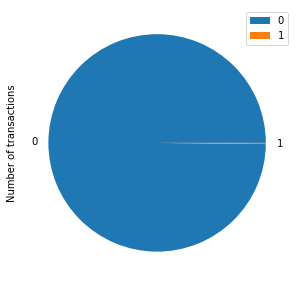

In [7]:
data['Class'].value_counts().plot(kind='pie', xlabel="Fraud", ylabel="Number of transactions", legend=True, figsize=(5,5))

In [8]:
smote = SMOTE(sampling_strategy=1)
X_sampled, class_col_sampled = smote.fit_resample(X, class_col)

<AxesSubplot:ylabel='Number of transactions'>

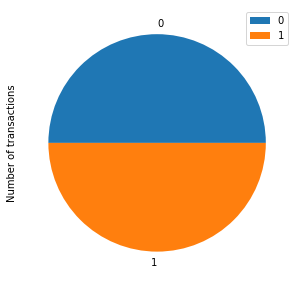

In [9]:
class_col_sampled.value_counts().plot(kind='pie', xlabel="Fraud", ylabel="Number of transactions", legend=True, figsize=(5,5))

## EXPERIMENTS

In [7]:
# data scaling

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [8]:
#train - test split

X_train, X_test, y_train, y_test = train_test_split(X, class_col, test_size=0.2, random_state=42)

In [9]:
# Functions to get the best possible hyperparameters for the methods

def get_best_RF(x_train, y_train):
    
    RandomForest = RandomForestClassifier()

    search_space = {"criterion": ["gini","entropy"],
                    "max_depth" : [10, 20, None]}

    Best_RandomForest = GridSearchCV(RandomForest, search_space)
    
    Best_RandomForest.fit(x_train, y_train) 
    
    return Best_RandomForest


def get_best_KNN(x_train, y_train):
    
    KNN = KNeighborsClassifier()
    
    search_space = {"n_neighbors": [3, 5, 7, 11],
                   "weights": ['uniform', 'distance']}
    
    Best_KNN = GridSearchCV(KNN, search_space)
    
    Best_KNN.fit(x_train, y_train)
    
    return KNN


def get_best_NN(x_train, y_train):
    
    NN = MLPClassifier()

    search_space = { "max_iter": [50, 100],
                     "hidden_layer_sizes" : [(50,), (100,)],
                    }

    best_NN = GridSearchCV(NN, search_space)

    best_NN.fit(x_train, y_train) 
    
    return best_NN


def get_best_SVM(x_train, y_train):
    
    SVM = SVC()

    search_space = { "C": [1,2],
                    "kernel" : ["linear", "rbf"]}

    best_SVM = GridSearchCV(svm, search_space)

    best_SVM.fit(x_train, y_train) 
    
    return best_SVM

Experiment 1 - SMOTE and best fraud %

In [10]:
smote50 = SMOTE(sampling_strategy=1)
X_train_50, Y_sampled_50 = smote50.fit_resample(X_train, y_train)

smote25 = SMOTE(sampling_strategy=0.5)
X_train_25, Y_sampled_25 = smote25.fit_resample(X_train, y_train)

In [11]:
# GET METRICS

# Best RF
print("Getting RF...")
RF_original = get_best_RF(X_train, y_train)
RF_50 = get_best_RF(X_train_50, Y_sampled_50)
RF_25 = get_best_RF(X_train_25, Y_sampled_25)

Getting RF...


In [28]:
# Best KNN
print("Getting KNN...")
KNN_original = get_best_KNN(X_train, y_train)
KNN_50 = get_best_KNN(X_train_50, Y_sampled_50)
KNN_25 = get_best_KNN(X_train_25, Y_sampled_25)

Getting KNN...
50
25


In [12]:
# Best NN
print("Getting NN...")
NN_original = get_best_NN(X_train, y_train)
NN_50 = get_best_NN(X_train_50, Y_sampled_50)
NN_25 = get_best_NN(X_train_25, Y_sampled_25)

Getting NN...
50
25


In [31]:
# Best SVM
print("Getting SVM...")
SVM_original = get_best_SVM(X_train, y_train)
SVM_50 = get_best_SVM(X_train_50, Y_sampled_50)
SVM_25 = get_best_SVM(X_train_25, Y_sampled_25)

Getting SVM...


In [33]:
# Results

#RF
pred_RF_original = RF_original.predict(X_test)
pred_RF_50 = RF_50.predict(X_test)
pred_RF_25 = RF_25.predict(X_test)

In [42]:
#KNN
pred_KNN_original = KNN_original.predict(X_test)
pred_KNN_50 = KNN_50.predict(X_test)
pred_KNN_25 = KNN_25.predict(X_test)

50
25


In [35]:
#NN
pred_NN_original = NN_original.predict(X_test)
pred_NN_50 = NN_50.predict(X_test)
pred_NN_25 = NN_25.predict(X_test)

In [43]:
#SVM
print("ORIGINAL")
pred_SVM_original = SVM_original.predict(X_test)
pred_SVM_50 = SVM_50.predict(X_test)
pred_SVM_25 = SVM_25.predict(X_test)

ORIGINAL
50
25


In [40]:
# Metrics

print(f"RF\nOriginal: Acc = {accuracy_score(y_test, pred_RF_original)}, Recall={recall_score(y_test, pred_RF_original)}, Precision={precision_score(y_test, pred_RF_original)}")
print(f"Sampled_50: Acc = {accuracy_score(y_test, pred_RF_50)}, Recall={recall_score(y_test, pred_RF_50)}, Precision={precision_score(y_test, pred_RF_50)}")
print(f"Sampled_25: Acc = {accuracy_score(y_test, pred_RF_25)}, Recall={recall_score(y_test, pred_RF_25)}, Precision={precision_score(y_test, pred_RF_25)}")

RF
Original: Acc = 0.9995962220427653, Recall=0.7857142857142857, Precision=0.9746835443037974
Sampled_50: Acc = 0.9995962220427653, Recall=0.8469387755102041, Precision=0.9120879120879121
Sampled_25: Acc = 0.9995786664794073, Recall=0.8367346938775511, Precision=0.9111111111111111


In [45]:
print(f"\n\nKNN\nOriginal: Acc = {accuracy_score(y_test, pred_KNN_original)}, Recall={recall_score(y_test, pred_KNN_original)}, Precision={precision_score(y_test, pred_KNN_original)}")
print(f"Sampled_50: Acc = {accuracy_score(y_test, pred_KNN_50)}, Recall={recall_score(y_test, pred_KNN_50)}, Precision={precision_score(y_test, pred_KNN_50)}")
print(f"Sampled_25: Acc = {accuracy_score(y_test, pred_KNN_25)}, Recall={recall_score(y_test, pred_KNN_25)}, Precision={precision_score(y_test, pred_KNN_25)}")



KNN
Original: Acc = 0.9995259997893332, Recall=0.7755102040816326, Precision=0.9382716049382716
Sampled_50: Acc = 0.9981917769741231, Recall=0.8673469387755102, Precision=0.4857142857142857
Sampled_25: Acc = 0.9982093325374811, Recall=0.8673469387755102, Precision=0.4885057471264368


In [41]:
print(f"\n\nNN\nOriginal: Acc = {accuracy_score(y_test, pred_NN_original)}, Recall={recall_score(y_test, pred_NN_original)}, Precision={precision_score(y_test, pred_NN_original)}")
print(f"Sampled_50: Acc = {accuracy_score(y_test, pred_NN_50)}, Recall={recall_score(y_test, pred_NN_50)}, Precision={precision_score(y_test, pred_NN_50)}")
print(f"Sampled_25: Acc = {accuracy_score(y_test, pred_NN_25)}, Recall={recall_score(y_test, pred_NN_25)}, Precision={precision_score(y_test, pred_NN_25)}")



NN
Original: Acc = 0.999403110845827, Recall=0.7346938775510204, Precision=0.9
Sampled_50: Acc = 0.9991924440855307, Recall=0.8163265306122449, Precision=0.7407407407407407
Sampled_25: Acc = 0.9992626663389628, Recall=0.8061224489795918, Precision=0.7745098039215687


In [46]:
print(f"\n\nSVM\nOriginal: Acc = {accuracy_score(y_test, pred_SVM_original)}, Recall={recall_score(y_test, pred_SVM_original)}, Precision={precision_score(y_test, pred_SVM_original)}")
print(f"Sampled_50: Acc = {accuracy_score(y_test, pred_SVM_50)}, Recall={recall_score(y_test, pred_SVM_50)}, Precision={precision_score(y_test, pred_SVM_50)}")
print(f"Sampled_25: Acc = {accuracy_score(y_test, pred_SVM_25)}, Recall={recall_score(y_test, pred_SVM_25)}, Precision={precision_score(y_test, pred_SVM_25)}")



SVM
Original: Acc = 0.9993153330290369, Recall=0.6224489795918368, Precision=0.9682539682539683
Sampled_50: Acc = 0.9840595484709105, Recall=0.9081632653061225, Precision=0.09008097165991903
Sampled_25: Acc = 0.9976475545100242, Recall=0.8877551020408163, Precision=0.4142857142857143


In [47]:
#Graphs


metrics_RF_o = [0.9995962220427653, 0.7857142857142857, 0.9746835443037974]
metrics_RF_50 = [0.9995962220427653, 0.8469387755102041, 0.9120879120879121]
metrics_RF_25 = [0.9995786664794073, 0.8367346938775511, 0.9111111111111111]

metrics_KNN_o = [0.9995259997893332, 0.7755102040816326, 0.9382716049382716]
metrics_KNN_50 = [0.9981917769741231, 0.8673469387755102, 0.4857142857142857]
metrics_KNN_25 = [0.9982093325374811, 0.8673469387755102, 0.4885057471264368]

metrics_NN_o = [0.999403110845827, 0.7346938775510204, 0.9]
metrics_NN_50 = [0.9991924440855307, 0.8163265306122449, 0.7407407407407407]
metrics_NN_25 = [0.9992626663389628, 0.8061224489795918, 0.7745098039215687]

metrics_SVM_o = [0.9993153330290369, 0.6224489795918368, 0.9682539682539683]
metrics_SVM_50 = [0.9840595484709105, 0.9081632653061225, 0.09008097165991903]
metrics_SVM_25 = [0.9976475545100242, 0.8877551020408163, 0.4142857142857143]


In [13]:
feat_imp = RF_50.feature_importances_

In [2]:
ind_10 = np.argpartition(feat_imp, -10)[-10:]
print(ind_10)

X = X[:, ind_10]